In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- If youve already done this for Ne, you dont need to do here too

In [2]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.22'

In [4]:
# Add the path with your spectra in
meta_path=r'G:\My Drive\Berkeley_NEW\LaPalma_Kyle\Kyle_MI_Test\Metadata'
spectra_path=r'G:\My Drive\Berkeley_NEW\LaPalma_Kyle\Kyle_MI_Test\Spectra'


In [5]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, prefix=True removes it
prefix=False

## This function finds all files in your path with the specified file format
- As you will fit your Ne lines in a different workbook, you can use 'exclude_str' to put any text that appears in all your Ne files, and it won't look here

In [6]:
Diad_files=pf.get_diad_files(path=spectra_path, file_ext=file_ext, exclude_str='NE ',
                            exclude_str_2='nodiad')
Diad_files[0:5]

exclude type
.png


['02 LM0 G1 MI1.txt',
 '04 LM0 G1 MI2.txt',
 '06 LM0 G2 MI1.txt',
 '08 NO CO2 LM0 G2 MI2.txt',
 '09 NO CO2 LM0 G2 MI3.txt']

## Must be a way of filtering them on strength...

In [7]:
max_diad1=np.empty(len(Diad_files), dtype=float)
max_diad2=np.empty(len(Diad_files), dtype=float)
index_diad=np.empty(len(Diad_files), dtype=float)
i=0
for file in Diad_files:
    
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    
    Med_LHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1180)& (Diad[:, 0]<1220)])
    Med_RHS_diad1=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)])
    Med_LHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1360)])
    Med_RHS_diad2=np.nanmedian(Diad[(Diad[:, 0]>1440)& (Diad[:, 0]<1470)])    
    #Med_central_back_diad2=np.nanmedian(Diad[(Diad[:, 0]>1300)& (Diad[:, 0]<1350)]
    
    Diad_diad1=Diad[(Diad[:, 0]>1280)& (Diad[:, 0]<1295)]
    Diad_diad2=Diad[(Diad[:, 0]>1385)& (Diad[:, 0]<1395)]
    max_diad1[i]=np.max(Diad_diad1[:, 1])-  (Med_LHS_diad1+Med_RHS_diad1)/2       
    max_diad2[i]=np.max(Diad_diad2[:, 1]) - (Med_LHS_diad2+Med_RHS_diad2)/2 
    index_diad[i]=i
    i=i+1


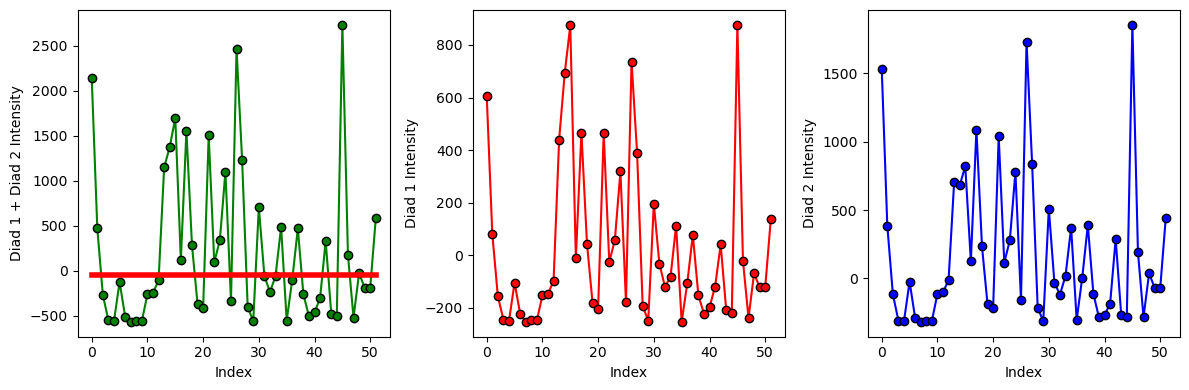

In [8]:
fig, (ax3, ax1, ax2) = plt.subplots(1, 3, figsize=(12,4))

combo_cutoff=-50

ax1.set_xlabel('Index')
ax2.set_xlabel('Index')
ax3.set_xlabel('Index')
ax3.set_ylabel('Diad 1 + Diad 2 Intensity')
ax2.set_ylabel('Diad 2 Intensity')
ax1.set_ylabel('Diad 1 Intensity')

ax1.plot(index_diad, max_diad1,  '-r')
ax1.plot(index_diad, max_diad1,  'ok', mfc='red')

ax2.plot(index_diad, max_diad2,  '-b')
ax2.plot(index_diad, max_diad2,  'ok', mfc='blue')

ax3.plot(index_diad, max_diad2+max_diad1,  '-g')
ax3.plot(index_diad, max_diad2+max_diad1,  'ok', mfc='green')
ax3.plot([np.min(index_diad), np.max(index_diad)],
         [combo_cutoff, combo_cutoff], '-r', lw=4)

## This gets dense diad files
Diad_Files_Dense=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)>combo_cutoff])
Diad_Files_Weak=list(pd.Series(Diad_files).loc[(max_diad2+max_diad1)<=combo_cutoff])

# ax1.set_yscale('log')
# ax2.set_yscale('log')
# ax3.set_yscale('log')
fig.tight_layout()

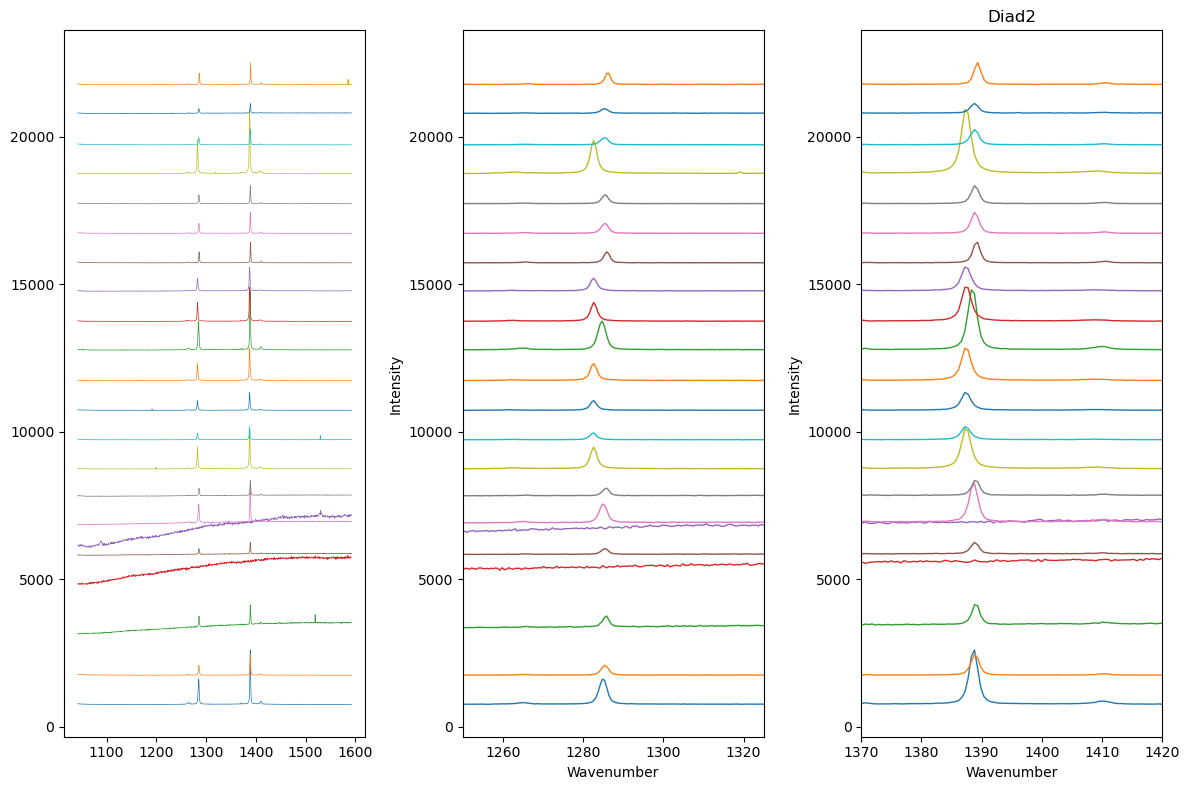

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Dense:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

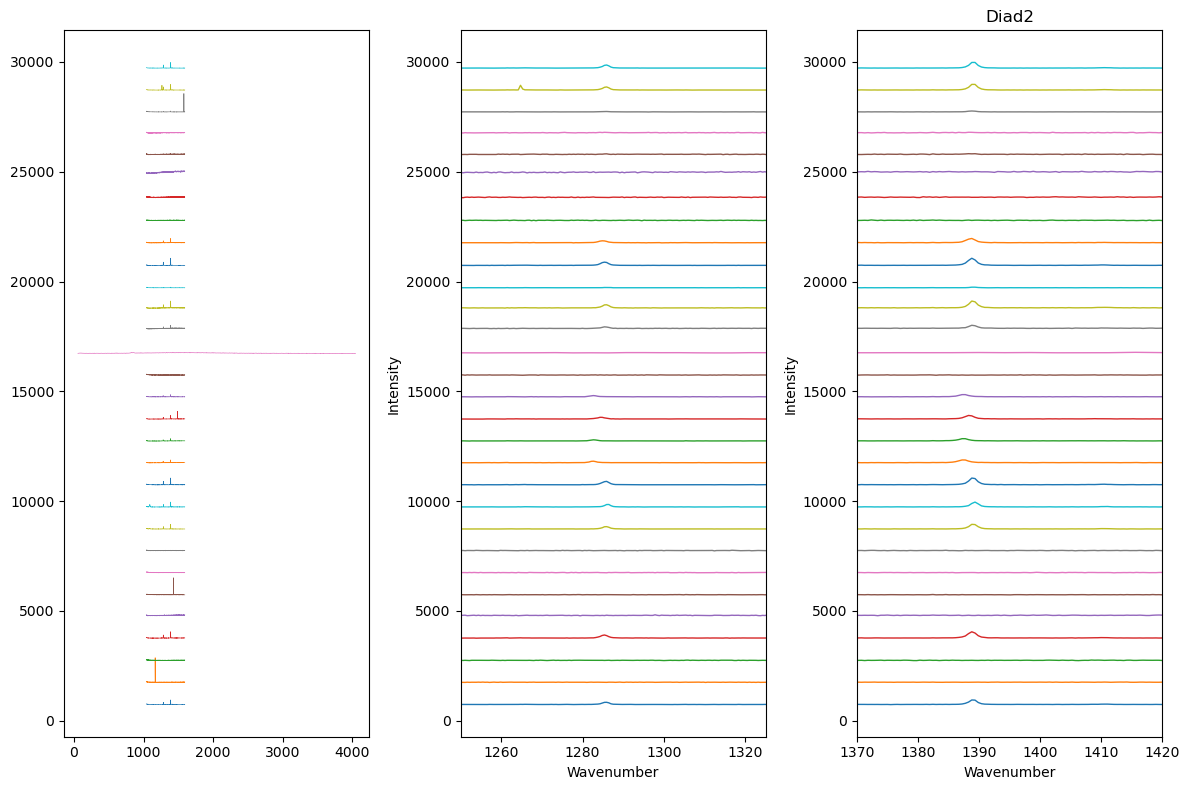

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12,8))
i=0
lw=1
for file in Diad_Files_Weak:
    Diad=pf.get_data(path=spectra_path, filename=file, filetype=filetype)
    ax0.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=0.5)
    ax1.plot(Diad[:, 0], Diad[:, 1]+i, '-', lw=1)
    ax1.set_xlim([1250, 1325])  
    
    ax2.set_title('Diad2')
    ax2.plot(Diad[:, 0],Diad[:, 1]+i, '-', lw=1)
    ax2.set_xlim([1370, 1420])
    i=i+1000
    
#ax0.set_xlabel('Wavenumber')
#ax0.set_ylabel('Intensity')
ax1.set_xlabel('Wavenumber')
ax1.set_ylabel('Intensity')
ax2.set_xlabel('Wavenumber')
ax2.set_ylabel('Intensity')   
fig.tight_layout()

In [33]:
Diad_Files_Dense

['02 LM0 G1 MI1.txt',
 '04 LM0 G1 MI2.txt',
 '22 LM0 G10 MI1.txt',
 '24 LM0 G10 MI2 BUBBLE 1.txt',
 '25 LM0 G10 MI2 BUBBLE 2.txt',
 '26 LM0 G14 MI1.txt',
 '28 LM0 G14 MI2.txt',
 '30 LM0 G18 MI1.txt',
 '36 LM0 G20 FI3.txt',
 '38 LM0 G20 FI4.txt',
 '40 LM0 G20 FI5.txt',
 '42 LM0 G20 FI6.txt',
 '46 LM0 G20 FI8.txt',
 '48 LM0 G20 FI9.txt',
 '53 LM0 G20 FI12.txt',
 '61 LM0 G22 MI1 BUBBLE 1 OF 2.txt',
 '67 LM0 G22 MI3.txt',
 '74 LM0 G24 MI1.txt',
 '78 LM0 G25 FI1.txt',
 '80 LM0 G25 MI2.txt',
 '83 LM0 G26 MI1.txt',
 '88 LM0 G27 MI2.txt']

## strong Diads first
- This allows you to tweak parameters for your spectra and your instrument

In [11]:
filename=Diad_Files_Dense[8] #'23 MP2_2_MIB_12mW.txt'#  # This finds the first file

# Alternatively, you can specify the actual file name if you want to fit a specific one
#filename='007_k9.csv'
print(filename)

36 LM0 G20 FI3.txt


## First we plot the spectra
- This lets you look at the spectra, decide how strong your hotbands are, and see how elevated the diads are (if they are very elevated, you may need to fit a gaussian background too)

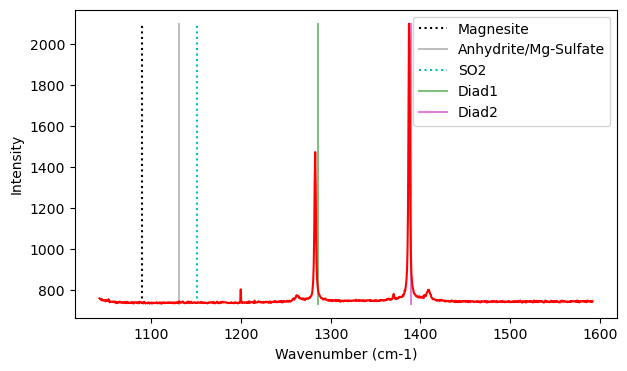

In [12]:
pf.plot_diad(path=spectra_path, filename=filename, filetype=filetype)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- First, look at the presets, you can edit them in carb_peak_config by typing the variable name, and a new value

In [13]:
# Decide if you want to fit a carbonate peak or not here. 
fit_carbonate=False

# Tweak options here, can exclude a range for example using exclude_range=Tuple[float, float]
Carb_Config=pf.carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330))
Carb_Config   

carb_peak_config(lower_bck=(1060, 1065), upper_bck=(1120, 1330), N_poly_carb_bck=1, amplitude=1000, cent_carbonate=1090, outlier_sigma=12, N_peaks=3, distance=10, prominence=5, width=6, threshold=0.1, exclude_range=None, dpi=100, plot_figure=True)

## This actually does the work fitting the carbonate peak

In [14]:
Carb_fit=pf.fit_carbonate_peak(config=Carb_Config, path=spectra_path, 
filename=filename, filetype=filetype,
fit_carbonate=fit_carbonate)
Carb_fit

## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

In [15]:
diad_id_config=pf.diad_id_config(height=50)
diad_id_config

diad_id_config(exclude_range1=None, exclude_range2=None, approx_diad2_pos=(1379, 1395), approx_diad1_pos=(1275, 1295), height=50, distance=5, threshold=0.5, width=0.5, prominence=10, plot_figure=True)

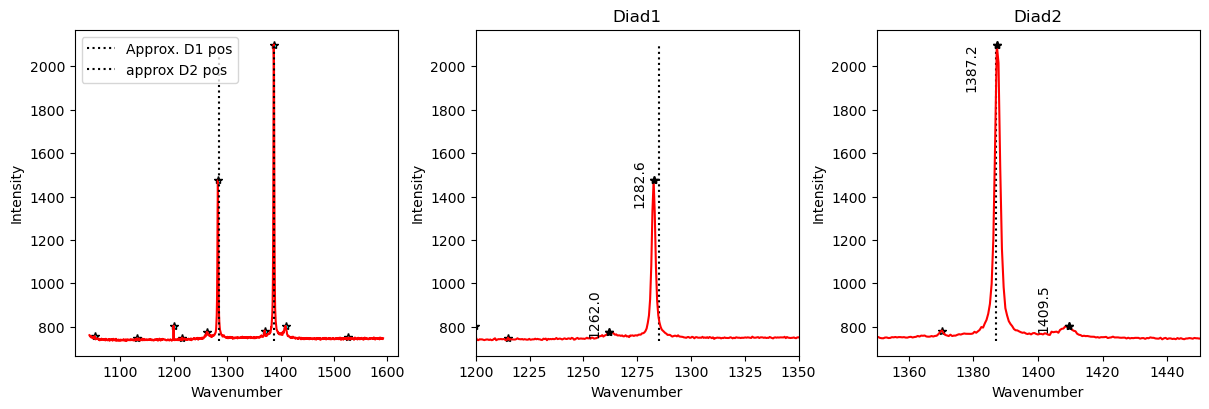

In [16]:
# Specify the number of peaks, 1 = just peak, 2 = Peak+hot bands
n_peaks_diad1=2
n_peaks_diad2=2

    
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config, path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2)

In [17]:
diad2_peaks

(1387.213807, 1409.455603)

## If you have no diads visible...
- change True to False, and it will just save the carbonate peak parameters

In [18]:
diads_present=True
pf.proceed_to_fit_diads(filename, Carb_fit, diads_present=diads_present)

Move on to fit diads


## Fit Diad 1
- This function uses the guess of the peak parameters above. 
- For very dense diads, you may need to fit a gaussian background, defined by peak_pos_gauss=None, gauss_sigma=1, gauss_amp=3000
- Otherwise, the background is fitted with a polynomial you can set the degree for (Default =1) based on background positoins defined by lower_bck, upper_bck...
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

In [25]:
diad1_fit_config=pf.diad1_fit_config(peak_pos_gauss=1280,
                                     upper_bck_diad1=(1320, 1350),
                                     x_range_residual=10, x_range_baseline=10,
                                    HB_amplitude=50, diad_amplitude=1000)
diad1_fit_config

diad1_fit_config(peak_pos_gauss=1280, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220), upper_bck_diad1=(1320, 1350), diad_amplitude=1000, HB_amplitude=50, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,HB1_Cent,HB1_Area,Residual_Diad1
0,1282.629986,1876.347448,0.556692,0.556692,1262.761273,263.840473,2.082131


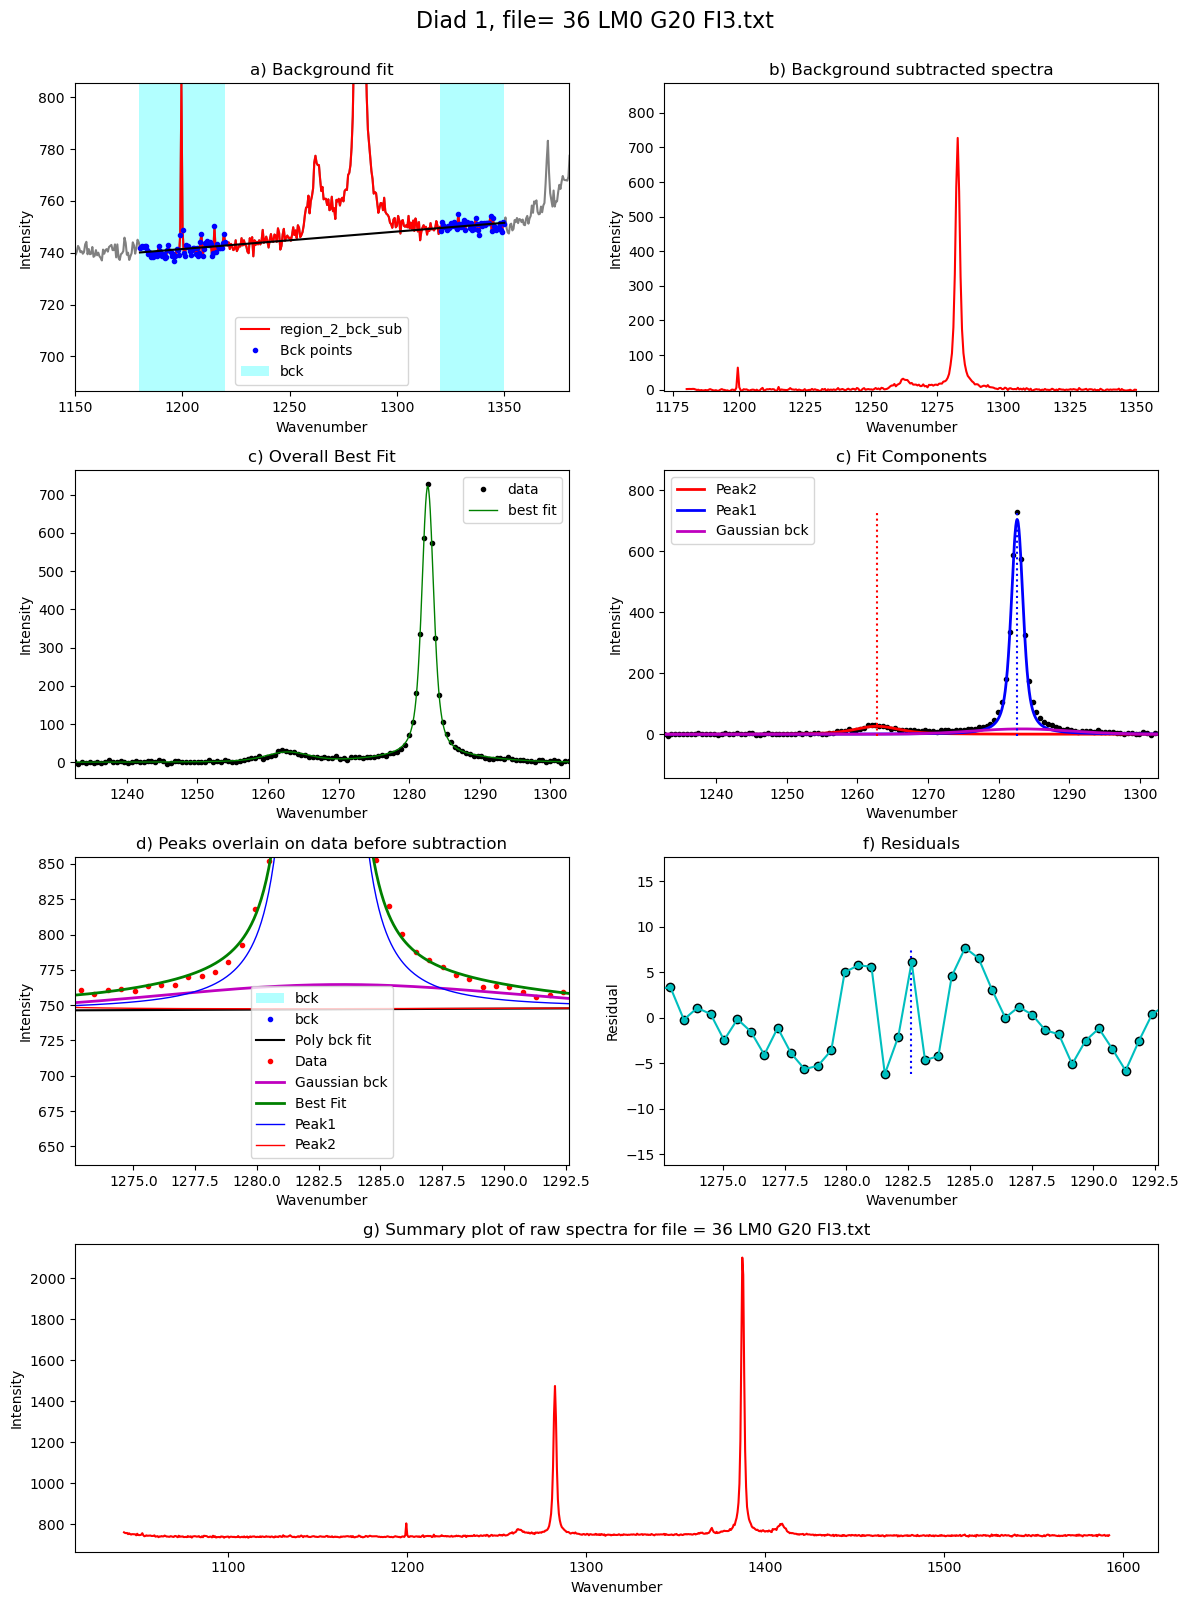

In [26]:
# For very dense spectra, with a very elevated background, you'll need to add a gaussian fit
# If you put a number in brackets, it'll center a gaussian extra background near there. 


# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad1_fit

## Fit diad 2

In [29]:
diad2_fit_config=pf.diad2_fit_config(peak_pos_gauss=1400,
                                     x_range_residual=10, 
                                     lower_bck_diad2=(1300, 1340),
                                     x_range_baseline=10,
                                     HB_amplitude=100,
                                    diad_amplitude=1000)
diad2_fit_config

diad2_fit_config(peak_pos_gauss=1400, gauss_sigma=1, gauss_amp=3000, diad_sigma=0.2, N_poly_bck_diad2=1, lower_bck_diad2=(1300, 1340), upper_bck_diad2=(1440, 1470), diad_amplitude=1000, HB_amplitude=100, x_range_baseline=10, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=10, return_other_params=False)

,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,HB2_Cent,HB2_Area,Residual_Diad2
0,1387.426241,3437.929191,0.528745,0.528745,1408.85681,406.075986,3.681283


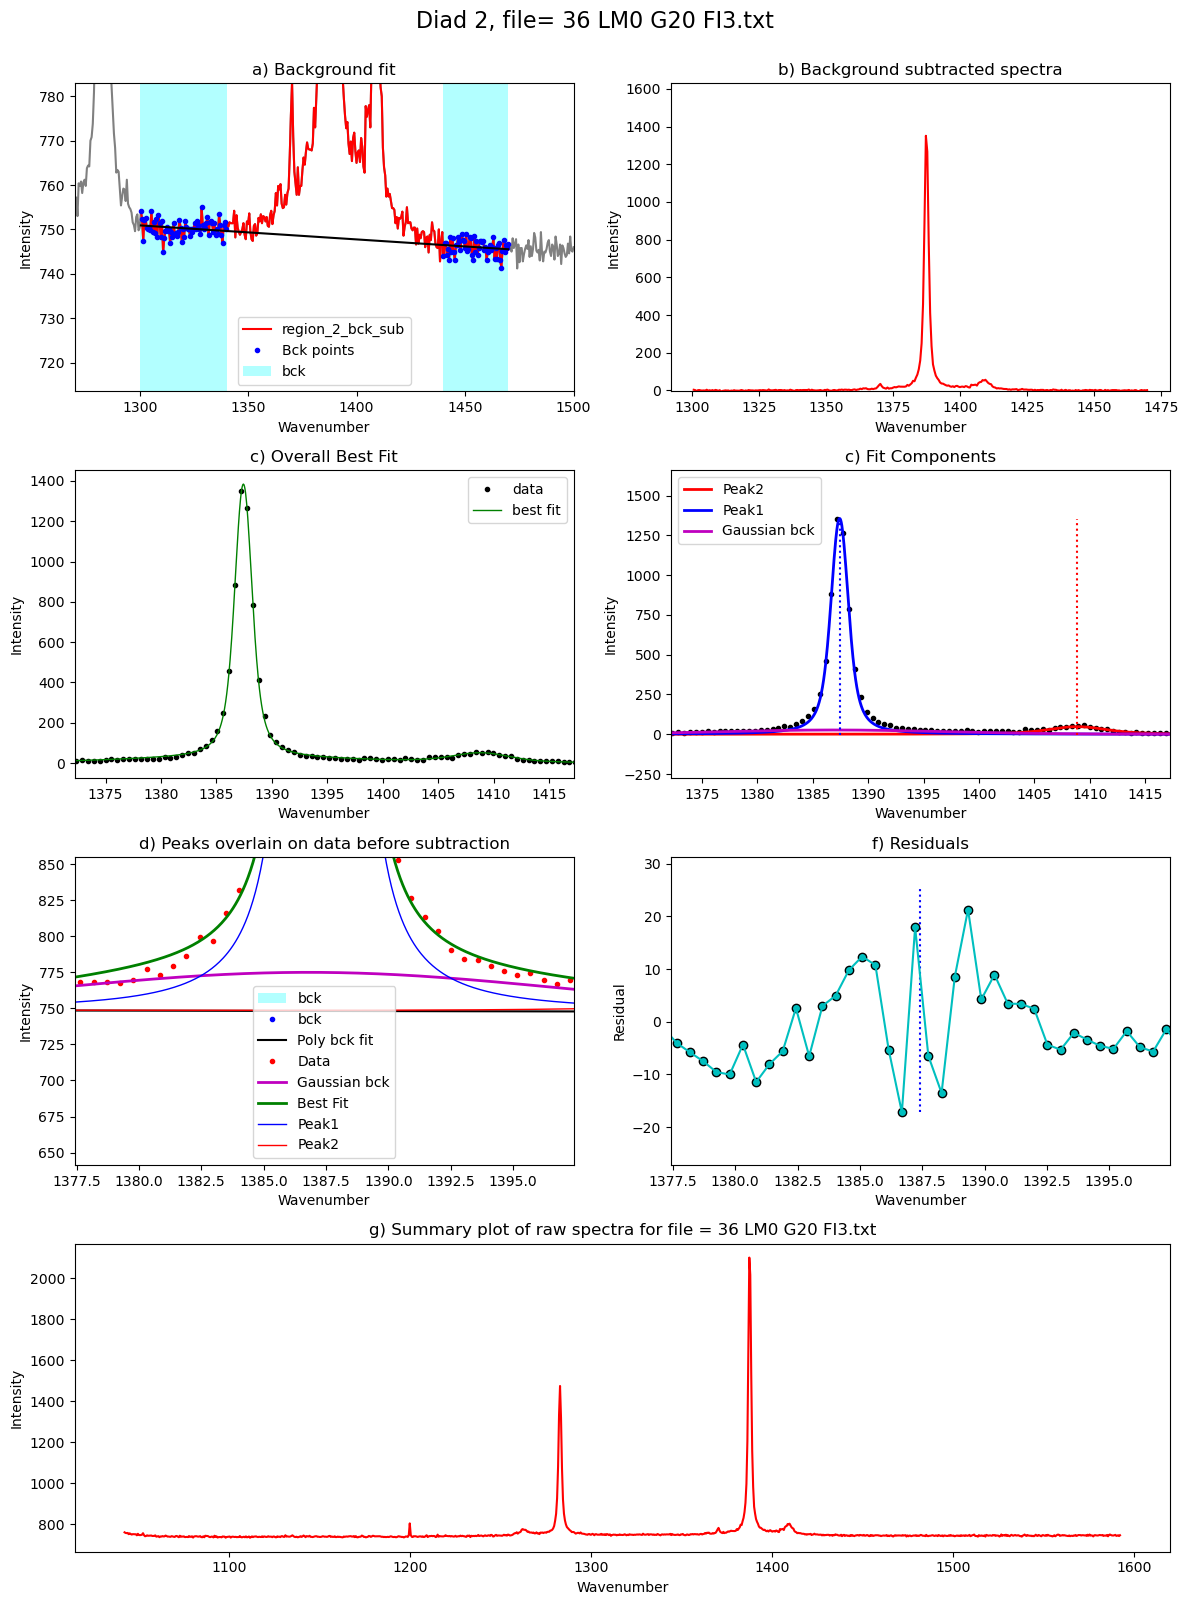

In [30]:
# Do you want to save the figure?
# This function does the work fitting the diad
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad2_peaks,
path=spectra_path, filename=filename, filetype=filetype, close_figure=False)
Diad2_fit

## Combine and save
- Saves to clipboard if to_clipboard=True (e.g. you can paste into a spreadsheet)
- Also saves to 'csv' in a folder in "spectra_path" if to_csv=True)
- It also makes a new 

In [31]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, to_clipboard=True, to_csv=True, path=spectra_path,
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,36 LM0 G20 FI3,104.796254,1282.629986,1876.347448,0.556692,0.556692,2.082131,1387.426241,3437.929191,0.528745,0.528745,3.681283,1262.761273,263.840473,1408.85681,406.075986,NaN,0


In [32]:
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,36 LM0 G20 FI3,104.796254,1282.629986,1876.347448,0.556692,0.556692,2.082131,1387.426241,3437.929191,0.528745,0.528745,3.681283,1262.761273,263.840473,1408.85681,406.075986,NaN,0


## You can also try looping if all your spectra are pretty similar

In [138]:
from tqdm import tqdm
plot_figure=True # Means doesnt have to make figures, lot faster. 
to_clipboard=False # Copies to clipboard
Diad_Files_Dense_i=Diad_Files_Dense
df_Dense = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files_Dense))):
    
    filename=Diad_Files_Dense[i]

    
    diad1_peaks, diad2_peaks=pf.identify_diad_peaks(config=diad_id_config,
            path=spectra_path, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, 
    n_peaks_diad2=n_peaks_diad2, plot_figure=False)

    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config,
        config2=diad_id_config, peak_pos_voigt=diad2_peaks,
    path=spectra_path, filename=filename, filetype=filetype)
    
    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config,
    config2=diad_id_config, peak_pos_voigt=diad1_peaks,
path=spectra_path, filename=filename, filetype=filetype)
    
    data=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, path=spectra_path,
 to_clipboard=to_clipboard,
                                
Diad2_fit=Diad2_fit)
 

    df_Dense = pd.concat([df_Dense, data], axis=0)


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:29<00:00,  1.87s/it]


In [140]:
df_Dense

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,Diad2_Gamma,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,05 MP2_2_MIB_50X,103.047179,1285.756408,352.535714,0.230911,0.230911,2.925490,1388.803587,532.909135,0.170532,0.170532,2.816598,NaN,0,NaN,0,NaN,0
0,07 MP2_3_FIA_50X_8mW,103.497734,1284.648813,768.136129,0.421162,0.421162,3.082434,1388.146547,1162.162511,0.335746,0.335746,4.108237,NaN,0,NaN,0,NaN,0
0,08 MP2_3_FIA_50X_5mW,103.526635,1284.558932,1041.063247,0.422867,0.422867,3.357752,1388.085567,1617.468705,0.335321,0.335321,4.868386,NaN,0,NaN,0,NaN,0
0,10 MP2_3_FIB_5mW,103.534440,1284.541361,746.638955,0.433214,0.433214,2.978030,1388.075801,1149.299130,0.334974,0.334974,3.555272,NaN,0,NaN,0,NaN,0
0,11 MP2_3_FIB_8mW,103.545705,1284.554802,1186.494108,0.420118,0.420118,3.640474,1388.100507,1838.735148,0.334514,0.334514,5.536882,NaN,0,NaN,0,NaN,0
0,13 MP2_3_FIC_8mW,103.522203,1284.548675,809.395265,0.421453,0.421453,2.909001,1388.070878,1225.860231,0.333971,0.333971,3.517349,NaN,0,NaN,0,NaN,0
0,14 MP2_3_FIC_5mW,103.549125,1284.530709,456.772805,0.440910,0.440910,2.027451,1388.079834,709.005361,0.343054,0.343054,2.535231,NaN,0,NaN,0,NaN,0
0,15 MP2_3_FIC_5mW_r1,103.540903,1284.548887,561.752444,0.448216,0.448216,2.345755,1388.089791,854.097837,0.332419,0.332419,2.829876,NaN,0,NaN,0,NaN,0
0,26 MP2_4_MIA_12mW,103.240123,1285.340659,1113.951446,0.285669,0.285669,4.119721,1388.580782,1715.536429,0.255570,0.255570,9.872716,NaN,0,NaN,0,NaN,0
0,27 MP2_4_FIA_12mW,103.643626,1284.341002,1684.417975,0.472011,0.472011,5.062477,1387.984628,2634.299011,0.353470,0.353470,7.894944,NaN,0,NaN,0,NaN,0


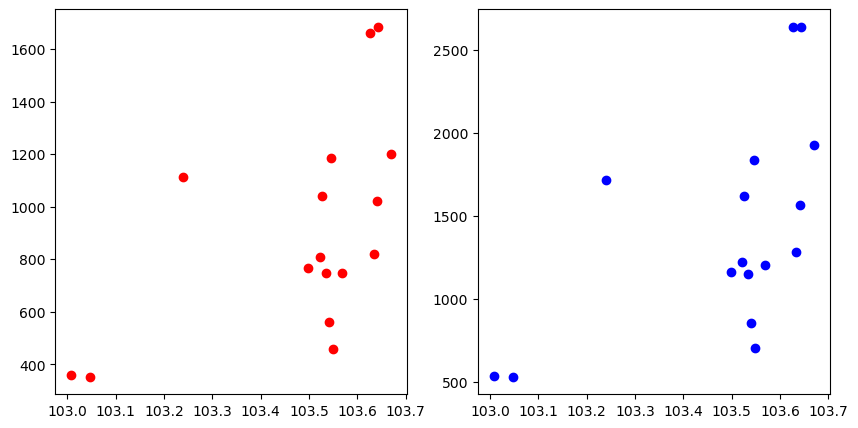

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Dense['Splitting'], df_Dense['Diad1_Area'], 'or')
ax2.plot(df_Dense['Splitting'], df_Dense['Diad2_Area'], 'ob')

df_not_too_Dense=df_Dense.loc[(df_Dense['Diad1_Area']>25) & (df_Dense['Diad2_Area']>30)]

## Extracting metadata for these diads

In [142]:


# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
exclude_str='Ne' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
diad_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

diad_meta[0:5]


['001 MP2_1_5X.txt',
 '002 MP1_1_MIA_20X.txt',
 '003 MP1_1_MIB_50X_Vweakdiad.txt',
 '005 MP1_1_MIC_weakDiad.txt',
 '006 MP1_1_MIC_weakDiad_50X.txt']

In [189]:
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=diad_meta, prefix=False,
                               trupower=True)

working on file001 MP2_1_5X.txt
working on file002 MP1_1_MIA_20X.txt
working on file003 MP1_1_MIB_50X_Vweakdiad.txt
working on file005 MP1_1_MIC_weakDiad.txt
working on file006 MP1_1_MIC_weakDiad_50X.txt
working on file007 MP1_1_MIC_weakDiad_20X.txt
working on file008 MP1_1_MID_weakdiad.txt
working on file009 MP1_1_MID_weakdiad_50X.txt
working on file010 MP1_1_MID_weakdiad_20X.txt
working on file011 MP1_1_MIE_nodiad_50X.txt
working on file012 MP1_1_MIE_nodiad_50X.txt
working on file013 MP2_2_MIA_50X.txt
working on file014 MP2_2_MIA_50X.txt
working on file015 MP2_2_MIA_20X.txt
working on file016 MP2_2_MIB_50X.txt
working on file017 MP2_2_MIB_50X.txt
working on file019 MP2_3_FIA_50X.txt
working on file020 MP2_3_FIA_50X_8mW.txt
working on file021 MP2_3_FIA_50X_5mW.txt
working on file023 MP2_3_FIA_andB_20X.txt
working on file024 MP2_3_FIB_50X_belowFIA.txt
working on file025 MP2_3_FIB_5mW.txt
working on file026 MP2_3_FIB_8mW.txt
working on file027 MP2_3_FIC_20X.txt
working on file028 MP2_3_

g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\importing_data_files.py:593: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Df_2['index']=Time_Df_2.index


In [190]:
meta['filename']

3                 005 MP1_1_MIC_weakDiad.txt
6                 008 MP1_1_MID_weakdiad.txt
9               011 MP1_1_MIE_nodiad_50X.txt
11                     013 MP2_2_MIA_50X.txt
14                     016 MP2_2_MIB_50X.txt
                       ...                  
128    147 MP2_8a_xstal3_MIE_12mW_nodiad.txt
131         150 MP2_8a_xstal3_MIF_nodiad.txt
133           152 MP2_8a_xstal3_MIG_12mW.txt
136           155 MP2_8a_xstal3_MIH_12mW.txt
138           158 MP2_8a_xstal3_MIJ_12mW.txt
Name: filename, Length: 63, dtype: object

## Stitching metadata and data together

In [191]:
meta['filename'][3]

'005 MP1_1_MIC_weakDiad.txt'

In [192]:
df_not_too_Dense['filename'][0]

0             05 MP2_2_MIB_50X
0         07 MP2_3_FIA_50X_8mW
0         08 MP2_3_FIA_50X_5mW
0             10 MP2_3_FIB_5mW
0             11 MP2_3_FIB_8mW
0             13 MP2_3_FIC_8mW
0             14 MP2_3_FIC_5mW
0          15 MP2_3_FIC_5mW_r1
0            26 MP2_4_MIA_12mW
0            27 MP2_4_FIA_12mW
0             28 MP2_4_FIA_5mW
0     63 MP2_8a_xstal1_FIA_5mW
0     65 MP2_8a_xstal1_FIB_5mW
0     66 MP2_8a_xstal1_FIC_5mW
0    69 MP2_8a_xstal1_FID_12mW
0    79 MP2_8a_xstal3_MIH_12mW
Name: filename, dtype: object

In [193]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=True, str_prefix=' ',
   file_type='.txt')

file_m

array(['MP1_1_MIC_weakDiad', 'MP1_1_MID_weakdiad', 'MP1_1_MIE_nodiad_50X',
       'MP2_2_MIA_50X', 'MP2_2_MIB_50X', 'MP2_3_FIA_50X_8mW',
       'MP2_3_FIA_50X_5mW', 'MP2_3_FIB_5mW', 'MP2_3_FIB_8mW',
       'MP2_3_FIC_8mW', 'MP2_3_FIC_5mW', 'MP2_3_FIC_5mW_r1',
       'MP2_3_FID_5mW', 'MP2_3_FID_8mW', 'MP2_3_MIA_8mW_vweak',
       'MP2_3_MIA_20mW_vweak', 'MP2_2_MIA_12mW', 'MP2_2_MIB_12mW',
       'MP2_2_MIB_12mW_r1', 'MP2_4_MIA_12mW', 'MP2_4_FIA_12mW',
       'MP2_4_FIA_5mW', 'MP2_4_MIB_12mW', 'MP2_4_MIB_12mW_r2',
       'MP2_4_MIC_50X', 'MP2_4_MID_12mW', 'MP2_5_MIA_12mW',
       'MP2_5_MIA_12mW_r1', 'MP2_5_MIB_12mW', 'MP2_5_MIC_nodiad',
       'MP2_5_MIC_nodiad2', 'MP2_5_xstal2_MID_nodiad',
       'MP2_5_xstal2_MIE_12mW', 'MP2_5_xstal2_MIE_12mW_r1',
       'MP2_5_xstal2_MIF_12mW', 'MP2_6_MI1_12mW',
       'MP2_6_xstal2_MIB_nodiad', 'MP2_6_xstal2_MIB_nodiad2',
       'MP2_6_xstal3_MIC_12mW', 'MP2_6_xstal3_MID_12mW',
       'MP2_6_xstal3_MIE_12mW', 'MP2_7_FIA_12mW_heated_peaks',
       'M

In [194]:
df_not_too_Dense['filename'].head()

0        05 MP2_2_MIB_50X
0    07 MP2_3_FIA_50X_8mW
0    08 MP2_3_FIA_50X_5mW
0        10 MP2_3_FIB_5mW
0        11 MP2_3_FIB_8mW
Name: filename, dtype: object

In [195]:
type(df_not_too_Dense['filename'])

pandas.core.series.Series

In [196]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df_not_too_Dense['filename'].reset_index(drop=True),
    prefix=True, str_prefix=' ',
   file_type='.txt')
file_s

array(['MP2_2_MIB_50X', 'MP2_3_FIA_50X_8mW', 'MP2_3_FIA_50X_5mW',
       'MP2_3_FIB_5mW', 'MP2_3_FIB_8mW', 'MP2_3_FIC_8mW', 'MP2_3_FIC_5mW',
       'MP2_3_FIC_5mW_r1', 'MP2_4_MIA_12mW', 'MP2_4_FIA_12mW',
       'MP2_4_FIA_5mW', 'MP2_8a_xstal1_FIA_5mW', 'MP2_8a_xstal1_FIB_5mW',
       'MP2_8a_xstal1_FIC_5mW', 'MP2_8a_xstal1_FID_12mW',
       'MP2_8a_xstal3_MIH_12mW'], dtype=object)

In [197]:
# Combining them together
meta['name_for_matching']=file_m
df_not_too_Dense['name_for_matching']=file_s
df_combo=df_not_too_Dense.merge(meta, on='name_for_matching')

In [198]:
df_combo.head()

,filename_x,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,Diad2_Area,Diad2_Sigma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,05 MP2_2_MIB_50X,103.047179,1285.756408,352.535714,0.230911,0.230911,2.925490,1388.803587,532.909135,0.170532,...,"October 16, 2022\n",20.005,45.0,3.0,50.0,"['0h', '2m', '16s']",8:55:19 AM\n,32119.0,1325.004,14
1,07 MP2_3_FIA_50X_8mW,103.497734,1284.648813,768.136129,0.421162,0.421162,3.082434,1388.146547,1162.162511,0.335746,...,"October 16, 2022\n",8.070,45.0,3.0,50.0,"['0h', '2m', '16s']",9:11:51 AM\n,33111.0,1325.004,17
2,08 MP2_3_FIA_50X_5mW,103.526635,1284.558932,1041.063247,0.422867,0.422867,3.357752,1388.085567,1617.468705,0.335321,...,"October 16, 2022\n",5.025,45.0,3.0,50.0,"['0h', '2m', '16s']",9:15:25 AM\n,33325.0,1325.004,18
3,10 MP2_3_FIB_5mW,103.534440,1284.541361,746.638955,0.433214,0.433214,2.978030,1388.075801,1149.299130,0.334974,...,"October 16, 2022\n",5.032,45.0,3.0,50.0,"['0h', '2m', '16s']",9:24:10 AM\n,33850.0,1325.004,21
4,11 MP2_3_FIB_8mW,103.545705,1284.554802,1186.494108,0.420118,0.420118,3.640474,1388.100507,1838.735148,0.334514,...,"October 16, 2022\n",7.952,45.0,3.0,50.0,"['0h', '2m', '16s']",9:27:20 AM\n,34040.0,1325.004,22


## Now load in the model for doing the Ne fitting

In [199]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_Example_ML1.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [200]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [201]:
density_df=pf.calculate_density_cornell(temp='SupCrit', Split=df_combo['Corrected_Splitting'])
df_combo.insert(1, 'Density', density_df['Preferred D'])

In [202]:
df_FIs=df_combo.loc[df_combo['filename_x'].str.contains('FI')]

In [207]:
df_FIs

,filename_x,Density,Corrected_Splitting,Splitting,Diad1_Cent,Diad1_Area,Diad1_Sigma,Diad1_Gamma,Residual_Diad1,Diad2_Cent,...,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index,Ne_Correction
1,07 MP2_3_FIA_50X_8mW,0.213926,103.274848,103.497734,1284.648813,768.136129,0.421162,0.421162,3.082434,1388.146547,...,8.070,45.0,3.0,50.0,"['0h', '2m', '16s']",9:11:51 AM\n,33111.0,1325.004,17,0.997846
2,08 MP2_3_FIA_50X_5mW,0.225910,103.303702,103.526635,1284.558932,1041.063247,0.422867,0.422867,3.357752,1388.085567,...,5.025,45.0,3.0,50.0,"['0h', '2m', '16s']",9:15:25 AM\n,33325.0,1325.004,18,0.997847
3,10 MP2_3_FIB_5mW,0.229179,103.311528,103.534440,1284.541361,746.638955,0.433214,0.433214,2.978030,1388.075801,...,5.032,45.0,3.0,50.0,"['0h', '2m', '16s']",9:24:10 AM\n,33850.0,1325.004,21,0.997847
4,11 MP2_3_FIB_8mW,0.233892,103.322783,103.545705,1284.554802,1186.494108,0.420118,0.420118,3.640474,1388.100507,...,7.952,45.0,3.0,50.0,"['0h', '2m', '16s']",9:27:20 AM\n,34040.0,1325.004,22,0.997847
5,13 MP2_3_FIC_8mW,0.224106,103.299374,103.522203,1284.548675,809.395265,0.421453,0.421453,2.909001,1388.070878,...,7.921,45.0,3.0,50.0,"['0h', '2m', '16s']",9:37:04 AM\n,34624.0,1325.004,25,0.997848
6,14 MP2_3_FIC_5mW,0.235347,103.326250,103.549125,1284.530709,456.772805,0.440910,0.440910,2.027451,1388.079834,...,5.012,45.0,3.0,50.0,"['0h', '2m', '16s']",9:39:53 AM\n,34793.0,1325.004,26,0.997848
7,15 MP2_3_FIC_5mW_r1,0.231912,103.318059,103.540903,1284.548887,561.752444,0.448216,0.448216,2.345755,1388.089791,...,5.003,45.0,3.0,50.0,"['0h', '2m', '16s']",9:42:52 AM\n,34972.0,1325.004,27,0.997848
9,27 MP2_4_FIA_12mW,0.275557,103.420773,103.643626,1284.341002,1684.417975,0.472011,0.472011,5.062477,1387.984628,...,12.103,45.0,3.0,50.0,"['0h', '2m', '17s']",10:31:09 AM\n,37869.0,1325.004,44,0.997850
10,28 MP2_4_FIA_5mW,0.274529,103.418386,103.641222,1284.342491,1022.001194,0.480354,0.480354,3.385692,1387.983713,...,5.008,45.0,3.0,50.0,"['0h', '2m', '16s']",10:33:52 AM\n,38032.0,1325.004,45,0.997850
11,63 MP2_8a_xstal1_FIA_5mW,0.268828,103.405122,103.627190,1284.297886,1660.945906,0.522829,0.522829,5.066024,1387.925076,...,5.040,45.0,3.0,50.0,"['0h', '2m', '16s']",1:22:25 PM\n,48145.0,1325.004,107,0.997857


In [204]:
FIs_AL=pf.convert_co2_density_depth_Coolprop(T_K=1200+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3='ryan_lerner',
    g=9.81, output='df')

FIs_27=pf.convert_co2_density_depth_Coolprop(T_K=1200+273.15,
    CO2_dens_gcm3=df_FIs['Density'].reset_index(drop=True),
    crust_dens_kgm3=2500,
    g=9.81, output='df')

(array([1., 3., 3., 1., 0., 0., 0., 2., 2., 1.]),
 array([2.84362617, 2.96761742, 3.09160868, 3.21559994, 3.3395912 ,
        3.46358246, 3.58757371, 3.71156497, 3.83555623, 3.95954749,
        4.08353874]),
 <BarContainer object of 10 artists>)

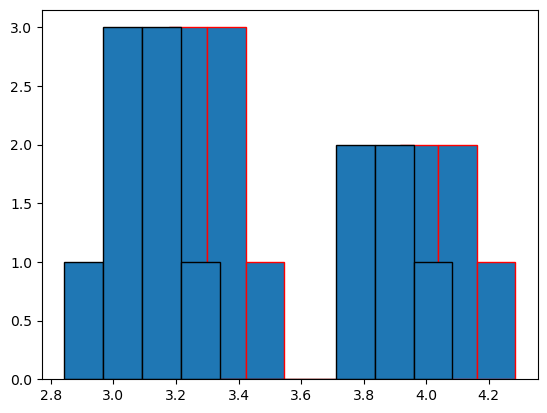

In [205]:
plt.hist(FIs_AL['Depth (km)'], ec='r')
plt.hist(FIs_27['Depth (km)'], ec='k', fc=None)

Text(0.5, 0, 'Density')

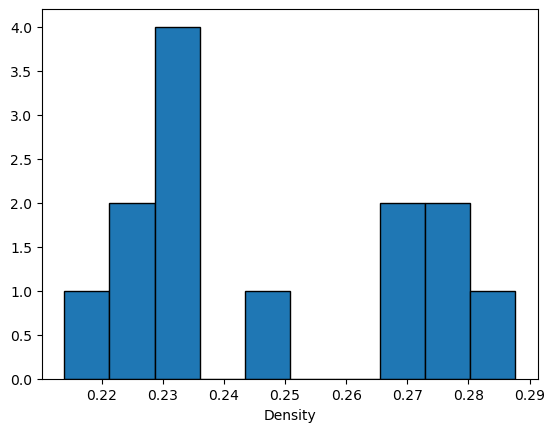

In [206]:
plt.hist(df_FIs['Density'], ec='k')
plt.xlabel('Density')